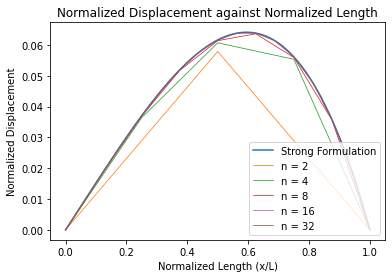

Exact value for the midpoint displacement:
0.06160207590701994
Extrapolated value for the midpoint displacement:
0.061604978810917636
Exact value for the root reaction:
0.15139205516732435
Extrapolated value for the root reaction direct differentiation method:
0.1531654060521521
Extrapolated value for the root reaction weak formulation method:
0.15140935326386765


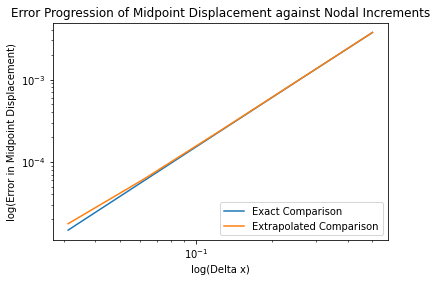

Exact rate of convergence midpoint
1.9959891995318209
Extrapolated rate of convergence midpoint
1.937921798550381


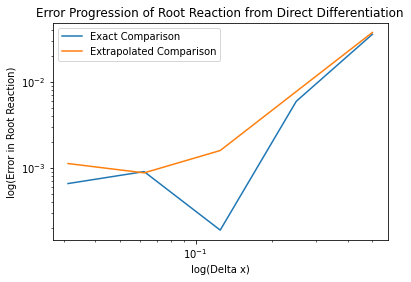

Exact rate of DD root reaction
1.4251259568218368
Extrapolated rate of DD root reaction
1.327138097940488


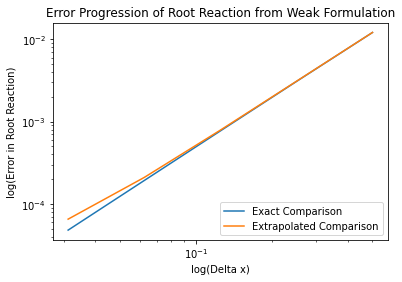

Exact rate of WF root reaction
1.9928691972846648
Extrapolated rate of WF root reaction
1.8933018564267041


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

rho = 1
omega = 1
A0 = 1
A_L = (7/11) * A0
E = 1
L = 1

K_1 = (-(1/9) + (11/48) + (121/96) + (1331/384) * np.log((7/11))) / ((11/4) * np.log((7/11)))

K_2 = -3993/256

# strong formulation
xs = np.linspace(0, L, 250)
u = [-(1/9)*x**3 + (11/48)*x**2 + (121/96)*x + 1331/384*np.log(-4*x/11 + 1) + 3993/256 - K_1 * 11/4*np.log(1-4*x/11) + K_2 for x in xs]
plt.plot(xs, u, label='Strong Formulation')

def u(x):
  return -(1/9)*x**3 + (11/48)*x**2 + (121/96)*x + 1331/384*np.log(-4*x/11 + 1) + 3993/256 - K_1 * 11/4*np.log(1-4*x/11) + K_2

def n(x):
  return -(x**2/2 - 4*x**3/33/L) + K_1

# weak formulation
def A(x):
  return A0 * (1 - x/L) + A_L * (x/L)


def f(x):
  return rho * A(x) * omega * omega * x


exact = -(1/9)*0.5**3 + (11/48)*0.5**2 + (121/96)*0.5 + 1331/384*np.log(-4*0.5/11 + 1) + 3993/256 - K_1 * 11/4*np.log(1-4*0.5/11) + K_2
extrapolated = (0.06066048415186346**2 -  0.057870370370370364 * 0.0613661130301583) / (2 * 0.06066048415186346 - 0.057870370370370364 - 0.0613661130301583)

exact_n0 = n(0)

dd_extrapolate = (0.1454632532218739**2 - 0.11574074074074073 * 0.1515802707482734) / (2 * 0.1454632532218739 - 0.11574074074074073 - 0.1515802707482734)
wf_extrapolate = (0.14832098413603115**2 - 0.13930976430976427 * 0.150621060049449) / (2 * 0.14832098413603115 - 0.13930976430976427 - 0.150621060049449)


maes_exact = []
maes_extrapolated = []
dxs = []

ndds = []
nwfs = []

ndds_exact = []
ndds_extrapolate = []
nwfs_exact = []
nwfs_extrapolate = []

for i in range(1, 6):
  n = 2**i

  # k matrix
  K = np.zeros((n - 1, n - 1))
  dx = L/n
  for row in range(1, n):
    for col in range(1, n):
      if (row == col):
        K[row - 1][col - 1] = (A((row - 0.5)*(dx))*E/(dx)) + (A((row + 0.5)*(dx))*E/(dx))
      elif ((row - col) == 1):
        K[row - 1][col - 1] = -(A((row - 0.5)*(dx))*E/(dx))
      elif ((row - col) == - 1):
        K[row - 1][col - 1] = -(A((row + 0.5)*(dx))*E/(dx))
      else:
        K[row - 1][col - 1] = 0

  # f matrix
  F = np.zeros((n - 1, 1))
  for l in range(1, n):
    F[l - 1][0] = (dx / 6) * (f((l - 1) * dx) + 4 * f(l * dx) + f((l + 1) * dx))


  U = np.linalg.solve(K, F)

  U = np.insert(U, 0, 0)
  U = np.append(U, [[0]])
  if i < 6:
    ######## This print is the displacements
    #print(U)
    norm_xs = np.linspace(0, L, n+1)
    plt.plot(norm_xs, U, label='n = '+str(n), linewidth=0.75)


  # This print is the midpoint displacements
  #print(U[2**(i-1)])
  maes_exact.append(np.abs(exact - U[2**(i-1)]))
  maes_extrapolated.append(np.abs(extrapolated - U[2**(i-1)]))
  dxs.append(dx)

  ndds.append(U[1] / dx)
  nwfs.append(A(0.5 * dx) * E * U[1] / dx + dx/6 * (2 * f(0) + f(dx)))

  ndds_exact.append(np.abs(exact_n0 - U[1]/dx))
  ndds_extrapolate.append(np.abs(dd_extrapolate - U[1]/dx))

  nwfs_exact.append(np.abs(exact_n0 - (A(0.5 * dx) * E * U[1] / dx + dx/6 * (2 * f(0) + f(dx)))))
  nwfs_extrapolate.append(np.abs(wf_extrapolate - (A(0.5 * dx) * E * U[1] / dx + dx/6 * (2 * f(0) + f(dx)))))

dxs = np.array(dxs)

# This print is the direct differentiation reactions
#print(ndds)
# This print is the weak formulation reactions
# print(nwfs)

log_dxs = np.log(dxs)
log_mex = np.log(maes_exact)
log_met = np.log(maes_extrapolated)

log_ndd_exact = np.log(ndds_exact)
log_ndd_extrapolate = np.log(ndds_extrapolate)
log_nwf_exact = np.log(nwfs_exact)
log_nwf_extrapolate = np.log(nwfs_extrapolate)

plt.xlabel('Normalized Length (x/L)')
plt.ylabel('Normalized Displacement')
plt.legend(loc='lower right')
plt.title('Normalized Displacement against Normalized Length')
plt.show()

print('Exact value for the midpoint displacement:')
print(exact)

print('Extrapolated value for the midpoint displacement:')
print(extrapolated)

print('Exact value for the root reaction:')
print(exact_n0)

print('Extrapolated value for the root reaction direct differentiation method:')
print(dd_extrapolate)

print('Extrapolated value for the root reaction weak formulation method:')
print(wf_extrapolate)

plt.plot(dxs, maes_exact, label='Exact Comparison')
plt.plot(dxs, maes_extrapolated, label='Extrapolated Comparison')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(Delta x)')
plt.ylabel('log(Error in Midpoint Displacement)')
plt.title('Error Progression of Midpoint Displacement against Nodal Increments')
plt.legend(loc = 'lower right')
plt.show()


slope, intercept = np.polyfit(log_dxs, log_mex, 1)
print('Exact rate of convergence midpoint')
print(slope)

slope, intercept = np.polyfit(log_dxs, log_met, 1)
print('Extrapolated rate of convergence midpoint')
print(slope)

#-----------------------------
plt.plot(dxs, ndds_exact, label='Exact Comparison')
plt.plot(dxs, ndds_extrapolate, label='Extrapolated Comparison')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(Delta x)')
plt.ylabel('log(Error in Root Reaction)')
plt.title('Error Progression of Root Reaction from Direct Differentiation')
plt.legend(loc='upper left')
plt.show()


slope, intercept = np.polyfit(log_dxs, log_ndd_exact, 1)
print('Exact rate of DD root reaction')
print(slope)

slope, intercept = np.polyfit(log_dxs, log_ndd_extrapolate, 1)
print('Extrapolated rate of DD root reaction')
print(slope)

#---------------------------------
plt.plot(dxs, nwfs_exact, label='Exact Comparison')
plt.plot(dxs, nwfs_extrapolate, label='Extrapolated Comparison')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(Delta x)')
plt.ylabel('log(Error in Root Reaction)')
plt.title('Error Progression of Root Reaction from Weak Formulation')
plt.legend(loc='lower right')
plt.show()


slope, intercept = np.polyfit(log_dxs, log_nwf_exact, 1)
print('Exact rate of WF root reaction')
print(slope)

slope, intercept = np.polyfit(log_dxs, log_nwf_extrapolate, 1)
print('Extrapolated rate of WF root reaction')
print(slope)
